In [1]:
import os
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # new

DATABASE_PATH = '../data/simple_time_based_model.zip'

# Allow us to display all the columns in a dataframe
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(DATABASE_PATH, compression='zip', header=0, sep=',', quotechar='"', low_memory=False, index_col=False)
df.shape

(2106220, 27)

In [3]:
df.head(5)

,EPA_REGION,POPULATION_SERVED_COUNT,PRIMACY_TYPE,PRIMARY_SOURCE_CODE,PWS_ACTIVITY_CODE,PWSID,PWS_TYPE_CODE,SERVICE_CONNECTIONS_COUNT,STATE_CODE,ZIP_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,1,39552.0,Tribal,GU,A,010106001,CWS,143,CT,06339-3060,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,1,41185.0,Tribal,GW,I,010109001,NTNCWS,1,NaN,NaN,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,37860.0,Tribal,SWP,A,010109005,CWS,20,CT,06382,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1,84.0,Tribal,GW,A,010307001,CWS,33,MA,02535,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
4,1,30.0,Tribal,GW,I,010502001,TNCWS,2,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.loc[0:10, 'PWSID':'HEALTH_BASED_VIOLATION_THIS_YEAR']

,PWSID,PWS_TYPE_CODE,SERVICE_CONNECTIONS_COUNT,STATE_CODE,ZIP_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR
0,010106001,CWS,143,CT,06339-3060,2018.0,0.0
1,010109001,NTNCWS,1,NaN,NaN,2018.0,0.0
2,010109005,CWS,20,CT,06382,2018.0,0.0
3,010307001,CWS,33,MA,02535,2018.0,0.0
4,010502001,TNCWS,2,RI,02813,2018.0,0.0
5,010502002,NTNCWS,1,RI,02813,2018.0,0.0
6,010502003,NTNCWS,4,RI,02813,2018.0,0.0
7,010502004,TNCWS,1,RI,02813,2018.0,0.0
8,020000001,CWS,120,NY,14779,2018.0,0.0
9,020000002,CWS,90,NY,14779,2018.0,0.0


### I. Data cleaning, filtering, aggregating

*ZIP_CODE needs cleaning, and only wanted one year of them to explore for now*

In [5]:
df = df.dropna(subset=['ZIP_CODE']) # Drop rows with zipcode NA
df.shape

(2012760, 27)

In [6]:
df_2017 = df[df.YEAR == 2017] # last complete year for this data
df_2017.shape

(402552, 27)

*Can see above that some zips have 4-digit extension, so examining those with >5 digits*

In [7]:
mask_bad = (df_2017.ZIP_CODE.str.len() > 5)
df_2017.loc[mask_bad].ZIP_CODE.unique().tolist()

['06339-3060',
 '49896-9728',
 '557720016',
 '565910418',
 '562410147',
 '545200346',
 '49969-0446',
 '55605-0428',
 '54861-0039',
 '54520-0346',
 '74821-1548',
 '74801-9381',
 '57770-4052',
 '57772-0490',
 '85269-7779',
 '85366-1899',
 '85726-6732',
 '85230-5009',
 '95932-4018',
 '95567-9525',
 '95642-1090',
 '95470-0039',
 '959324018',
 '89421-0457',
 '89410-1419',
 '97801-0638',
 '98271-9304',
 '99803-3597',
 '99801-9539',
 '99827-1209',
 '99827-0430',
 '84010-1389',
 '99827-0556',
 '99901-9067',
 '99923-0033',
 '99901-8500',
 '99950-0180',
 '998500360',
 '99901-5758',
 '99901-5698',
 '998500190',
 '99829-0360',
 '99820-0101',
 '995233368',
 '99577-0763',
 '99523-3368',
 '99517-2507',
 '99514-0330',
 '988012330',
 '995230732',
 '995777719',
 '99509-2685',
 '99511-0205',
 '99577-0121',
 '99524-2523',
 '99567-2549',
 '99509-2130',
 '99567-0607',
 '99587-0129',
 '99511-2045',
 '99567-0118',
 '98015-8501',
 '304585591',
 '995220569',
 '99516-1518',
 '995091198',
 '99521-0223',
 '9505490

*Some with & some without "-" separator, so just grabbing first 5 digits into a new column*

In [8]:
df_2017 = df_2017.assign(ZIP_CODE_5 = df_2017.ZIP_CODE.str[:5])

display(len(df_2017.ZIP_CODE_5.unique()))

#### https://www.zip-codes.com/zip-code-statistics.asp
# as of December, 2018:
# Total U.S. ZIP Codes 41,666
# General ZIP Codes 29,792 (71.5%)
# PO Box ZIP Codes 9,208 (22.1%)
# Military ZIP Codes 572 (1.4%)
# Unique/Business ZIP Codes 2,094 (5.0%)

35133

*Now collapsing to 1 row per zip and adding a row sum. Note: zip code areas can cross state lines, so just grouping on zip*

In [9]:
# ZIP_CODE_5, sum(HEALTH_BASED_VIOLATION_THIS_YEAR, NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR, 
# NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO, etc.)

df_2017_sum = df_2017.groupby(['ZIP_CODE_5'], 
                              as_index=False)[['HEALTH_BASED_VIOLATION_THIS_YEAR', 
                                               'NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR', 
                                               'NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO',
                                               'NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO', 
                                               'NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO',
                                               'NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO']] \
                      .sum().rename(columns={'HEALTH_BASED_VIOLATION_THIS_YEAR':'HBV_2017sum', 
                                             'NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR':'HBV_2016sum', 
                                             'NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO':'HBV_2015sum', 
                                             'NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO':'HBV_2014sum', 
                                             'NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO':'HBV_2013sum', 
                                             'NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO':'HBV_2012sum'})

df_2017_sum['HBV_5Ysum'] = df_2017_sum.sum(axis=1)
df_2017_sum.shape

(35133, 8)

In [10]:
df_2017_sum.head(5)

,ZIP_CODE_5,HBV_2017sum,HBV_2016sum,HBV_2015sum,HBV_2014sum,HBV_2013sum,HBV_2012sum,HBV_5Ysum
0,00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00020,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00086,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*some stats*

In [11]:
df_2017_sum.describe()

,HBV_2017sum,HBV_2016sum,HBV_2015sum,HBV_2014sum,HBV_2013sum,HBV_2012sum,HBV_5Ysum
count,35133.000000,35133.000000,35133.000000,35133.000000,35133.000000,35133.000000,35133.000000
mean,0.165372,0.411949,0.547377,0.510973,0.501807,0.495659,2.633137
std,0.611924,1.878336,1.992646,1.886307,1.854901,1.957919,8.469091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,28.000000,56.000000,54.000000,58.000000,81.000000,143.000000,273.000000


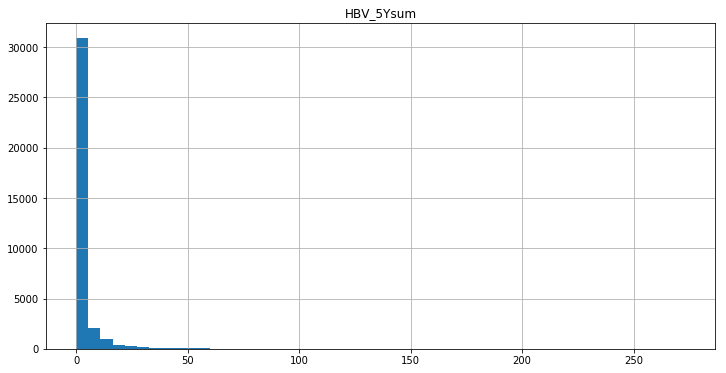

In [12]:
df_2017_sum.hist(column='HBV_5Ysum', bins=50, figsize=(12,6));

### II. Mapping

1. join with spatial info (center points)
2. mapping using basemap: https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

**Notes:** something to keep in mind, zip codes aren't really well defined areas: https://gis.stackexchange.com/questions/5114/obtaining-up-to-date-list-of-us-zip-codes-with-latitude-and-longitude-geocodes

trying this data (zip code tablulation areas from US census):
https://www.census.gov/geo/maps-data/data/gazetteer2016.html

In [13]:
ZIPCOORDS_PATH = '../data/2016_Gaz_zcta_national.zip'

ZipCoords = pd.read_csv(ZIPCOORDS_PATH, compression='zip', header=0, sep='\t', 
                        dtype={0:'str'}, quotechar='"', low_memory=False, index_col=False)
ZipCoords.shape

(33144, 7)

In [14]:
print(ZipCoords.columns) # Bad last column name

Index(['GEOID', 'ALAND', 'AWATER', 'ALAND_SQMI', 'AWATER_SQMI', 'INTPTLAT',
       'INTPTLONG                                                                                                                                  '],
      dtype='object')


In [15]:
col_name =ZipCoords.columns[6]
ZipCoords=ZipCoords.rename(columns = {col_name:'INTPTLONG'})

In [16]:
ZipCoords.head(5)

,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,00601,166659884,799293,64.348,0.309,18.180555,-66.749961
1,00602,79287203,4448761,30.613,1.718,18.361945,-67.175597
2,00603,81884707,183895,31.616,0.071,18.455183,-67.119887
3,00606,109579998,12487,42.309,0.005,18.158345,-66.932911
4,00610,93020979,4171994,35.916,1.611,18.295366,-67.125135


In [17]:
df_2017_sum = pd.merge(df_2017_sum, ZipCoords, left_on='ZIP_CODE_5', right_on='GEOID', how='inner', validate="m:1")

In [18]:
display(df_2017_sum.shape)
display(len(df_2017_sum.ZIP_CODE_5.unique())) # good

(29338, 15)

29338

In [19]:
df_2017_sum.head(5)

,ZIP_CODE_5,HBV_2017sum,HBV_2016sum,HBV_2015sum,HBV_2014sum,HBV_2013sum,HBV_2012sum,HBV_5Ysum,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,00601,2.0,8.0,12.0,14.0,11.0,4.0,51.0,00601,166659884,799293,64.348,0.309,18.180555,-66.749961
1,00602,0.0,0.0,0.0,16.0,7.0,6.0,29.0,00602,79287203,4448761,30.613,1.718,18.361945,-67.175597
2,00603,0.0,0.0,2.0,0.0,1.0,0.0,3.0,00603,81884707,183895,31.616,0.071,18.455183,-67.119887
3,00606,0.0,3.0,0.0,0.0,1.0,0.0,4.0,00606,109579998,12487,42.309,0.005,18.158345,-66.932911
4,00610,0.0,0.0,0.0,1.0,2.0,0.0,3.0,00610,93020979,4171994,35.916,1.611,18.295366,-67.125135


*Note: losing some so will be looking into that to find out which (both directions). Proceeding with mapping these anyway.*

In [20]:
# Extract the data for plotting
lat = df_2017_sum['INTPTLAT'].values
lon = df_2017_sum['INTPTLONG'].values
violations = df_2017_sum['HBV_5Ysum'].values

*Now finally the map. Don't have a great handle on the best symbology yet, but can see pretty good coverage and obvious geographic patterns.*

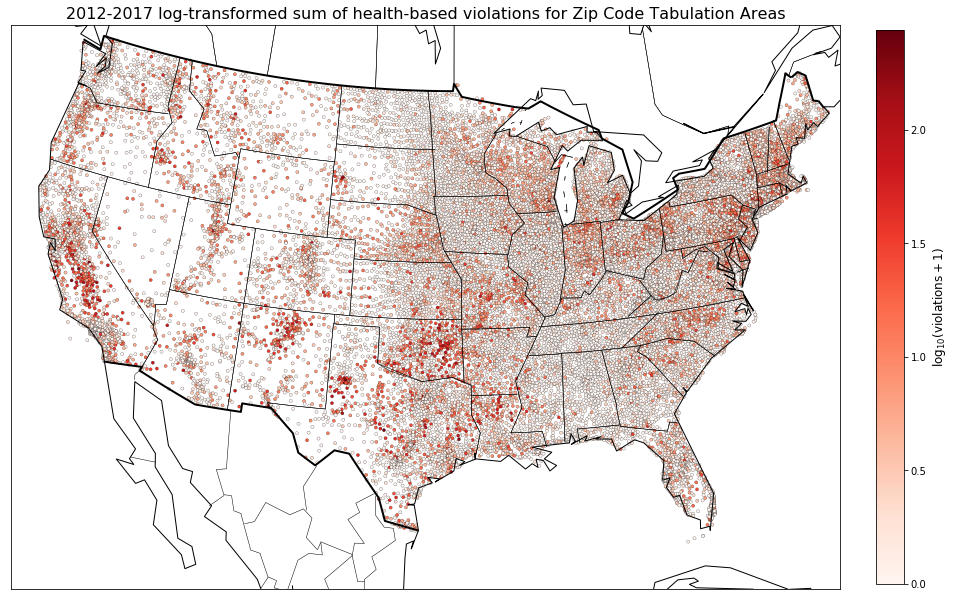

In [21]:
# see also: https://dataverse.tech/2018/04/20/basemap/

plt.figure(figsize=(16, 16))
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

m.drawcoastlines()
m.drawcountries(linewidth=2)
# m.drawrivers(color='blue')
# m.fillcontinents(color='g', lake_color='blue', alpha=0.5)
m.drawstates()
# m.bluemarble()

m.scatter(lon, lat, latlon=True, c=np.log10(violations+1), cmap='Reds', marker='o', 
          edgecolor='black', s=10, lw = 0.2) #, alpha = 0.5

plt.title('2012-2017 log-transformed sum of health-based violations for Zip Code Tabulation Areas', fontsize = 16)
plt.colorbar(fraction=0.031, pad=0.04).set_label(label=r'$\log_{10}({\rm violations+1})$', size = 12)
plt.show()

***
# Misc:

1. Does a 5-year sum make sense
2. Why the general decrease in sum from 2012 to 2017, I probably need to understand the data better
3. Probably zoom in to northeast for more exploration
4. Are Lat/Lon for PWSID readily available. See one in ECHO: https://echo.epa.gov/detailed-facility-report?fid=RI1858430&sys=SDWIS